<div style="background-color:rgba(0, 153, 0, 0.5);border-radius: 15px 50px;display:fill">
    <h1><center>1. Introduction</center></h1>
</div>

<div style="color:white;display:fill;border-radius:8px;
            background-color:#DAA520;font-size:150%;
            font-family:Nexa;letter-spacing:0.5px">
    <p style="padding: 8px;color:black;"><b>1.1 | Goal</b></p>
</div>

Welcome to the May edition of the 2022 Tabular Playground Series! This month's challenge is a binary classification problem that includes a number of different feature interactions. This competition is an opportunity to explore various methods for identifying and exploiting these feature interactions

<div style="color:white;display:fill;border-radius:8px;
            background-color:#DAA520;font-size:150%;
            font-family:Nexa;letter-spacing:0.5px">
    <p style="padding: 8px;color:black;"><b>1.2 | Evaluation</b></p>
</div>

Submissions are evaluated on area under the ROC curve between the predicted probability and the observed target.

<div class="alert alert-block alert-info">The shape of an ROC curve changes when a model changes the way it classifies the two outcomes.

The animation [below] starts with a model that cannot tell one outcome from the other, and the two distributions completely overlap (essentially a random classifier). As the two distributions separate, the ROC curve approaches the left-top corner, and the AUC value of the curve increases. When the model can perfectly separate the two outcomes, the ROC curve forms a right angle and the AUC becomes 1.</div>

![](https://github.com/dariyasydykova/open_projects/raw/master/ROC_animation/animations/ROC.gif)

<div style="background-color:rgba(0, 153, 0, 0.5);border-radius: 15px 50px;display:fill">
    <h1><center>2. Loading the data </center></h1>
</div>
<a id="2"></a><h2></h2>
<div style="color:white;display:fill;border-radius:8px;
            background-color:#DAA520;font-size:150%;
            font-family:Nexa;letter-spacing:0.5px">
    <p style="padding: 8px;color:black;"><b>2.1 | Train data</b></p>
</div>

In [ ]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import matplotlib.style as style 
style.use('ggplot')
import warnings
warnings.filterwarnings('ignore')

import plotly.offline as py 
from plotly.offline import init_notebook_mode, iplot
py.init_notebook_mode(connected=True) # this code, allow us to work with offline plotly version
import plotly.graph_objs as go # it's like "plt" of matplot

cell_hover = {  # for row hover use <tr> instead of <td>
    'selector': 'td:hover',
    'props': [('background-color', '#ffffb3')]
}
index_names = {
    'selector': '.index_name',
    'props': 'font-style: italic; color: darkgrey; font-weight:normal;'
}
headers = {
    'selector': 'th:not(.index_name)',
    'props': 'background-color: #000000; color: white;'
}
from IPython.display import HTML
pd.set_option('display.max_columns', None)

In [ ]:
train = pd.read_csv('../input/tabular-playground-series-may-2022/train.csv',index_col=['id'])
s=train.head()
s.style.set_table_styles([cell_hover, index_names])

<div style="color:white;display:fill;border-radius:8px;
            background-color:#DAA520;font-size:150%;
            font-family:Nexa;letter-spacing:0.5px">
    <p style="padding: 8px;color:black;"><b>2.2 | Quick quality check</b></p>
</div>

In [ ]:
# lets investigate the train data
train.describe()

<div style="color:white;display:fill;border-radius:8px;
            background-color:#DAA520;font-size:150%;
            font-family:Nexa;letter-spacing:0.5px">
    <p style="padding: 8px;color:black;"><b>2.3 | Missing data</b></p>
</div>

In [ ]:
# is there any missing data
train.isnull().sum()

In [ ]:
import plotly.express as px
import plotly.graph_objects as go
import plotly.figure_factory as ff
from plotly.subplots import make_subplots
import matplotlib.pyplot as plt
from colorama import Fore

from pandas_profiling import ProfileReport
import seaborn as sns
from sklearn import metrics
from scipy import stats
import math

from tqdm.notebook import tqdm
from copy import deepcopy
# Defining all our palette colours.
primary_blue = "#496595"
primary_blue2 = "#85a1c1"
primary_blue3 = "#3f4d63"
primary_grey = "#c6ccd8"
primary_black = "#202022"
primary_bgcolor = "#f4f0ea"

primary_green = px.colors.qualitative.Plotly[2]

plt.rcParams['axes.facecolor'] = primary_bgcolor

In [ ]:
# is there any duplicated data
train['is_duplicate'] = train.duplicated()
train['is_duplicate'].value_counts()

In [ ]:
train.drop('is_duplicate', inplace=True, axis=1)


## Early insights <br>
1) There are 900000 rows of data in the train, which is good. We have big data to train on.

2) There is no missing data

3) There is no duplicated data, need further investigation.

4) There are total 31 features, 30 numerical and one non-numerical.


<div style="color:white;display:fill;border-radius:8px;
            background-color:#DAA520;font-size:150%;
            font-family:Nexa;letter-spacing:0.5px">
    <p style="padding: 8px;color:black;"><b>2.4 | Feature correlation</b></p>
</div>

In [ ]:
corr = train.corr().abs()
mask = np.triu(np.ones_like(corr, dtype=np.bool))

fig, ax = plt.subplots(figsize=(30, 10), facecolor=primary_bgcolor)
# ax.text(-1.1, 0.16, 'Correlation between the Continuous Features', fontsize=10, fontweight='bold', fontfamily='serif')
ax.text(-1.1, 0.3, 'There is no features that pass more than 0.32 correlation within each other', fontsize=13, fontweight='light', fontfamily='serif')


# plot heatmap
sns.heatmap(corr, mask=mask, annot=True, fmt=".2f", cmap='coolwarm',annot_kws={"size": 12},
            cbar_kws={"shrink": .2}, vmin=0, vmax=1)
# yticks
plt.yticks(rotation=0)
plt.show()

In [ ]:
temp_train = pd.DataFrame(train['f_27'].value_counts()).reset_index(drop=False)
temp_train


## Early insights
1) The numerical features are weakly correlated with eachother. 

2) Out of 900000 rows, 741354 contain unique string in f_27. We might need to indepth investigation into this column. One possible scenario is counting the number of Alphabets for grouping purposes. For example BFAABAGSDB can be referred as 3A3B1G1S1D.



<div style="color:white;display:fill;border-radius:8px;
            background-color:#DAA520;font-size:150%;
            font-family:Nexa;letter-spacing:0.5px">
    <p style="padding: 8px;color:black;"><b>2.5 | Loading test data</b></p>
</div>

In [ ]:
test = pd.read_csv('../input/tabular-playground-series-may-2022/test.csv',index_col=['id'])
test.head()

In [ ]:
test.describe()

<div style="color:white;display:fill;border-radius:8px;
            background-color:#DAA520;font-size:150%;
            font-family:Nexa;letter-spacing:0.5px">
    <p style="padding: 8px;color:black;"><b>2.6 | Baseline visualization of test and train data</b></p>
</div>

In [ ]:
sns.set_palette(sns.color_palette([primary_blue, primary_grey]))

plt.rcParams['figure.dpi'] = 300
fig = plt.figure(figsize=(5, 2), facecolor=primary_bgcolor)
gs = fig.add_gridspec(1, 1)
gs.update(wspace=0, hspace=0)
ax0 = fig.add_subplot(gs[0, 0])
ax0.set_facecolor(primary_bgcolor)
ax0.set_xlim(-5,5)
ax0.tick_params(axis = "y", which = "both", left = False)

ax0.text(-5, 0.056, 'f_00', color='black', fontsize=7, ha='left', va='bottom', weight='bold')

# KDE plots
ax0_sns = sns.kdeplot(ax=ax0, x=train['f_00'], zorder=2, shade=True)
ax0_sns = sns.kdeplot(ax=ax0, x=test['f_00'], zorder=2, shade=True)

# Axis and grid customization
ax0_sns.set_xlabel("f_00",fontsize=5, weight='bold')
ax0_sns.set_ylabel('')
ax0.grid(which='major', axis='x', zorder=0, color='#EEEEEE')
ax0.grid(which='major', axis='y', zorder=0, color='#EEEEEE')

# Legend params
ax0.legend(['train', 'test'], prop={'size': 5})
ax0_sns.tick_params(labelsize=5)

plt.show()

In [ ]:
sns.set_palette(sns.color_palette([primary_blue, primary_grey]))

plt.rcParams['figure.dpi'] = 300
fig = plt.figure(figsize=(5, 2), facecolor=primary_bgcolor)
gs = fig.add_gridspec(1, 1)
gs.update(wspace=0, hspace=0)
ax0 = fig.add_subplot(gs[0, 0])
ax0.set_facecolor(primary_bgcolor)
ax0.set_xlim(-10,10)
ax0.tick_params(axis = "y", which = "both", left = False)

ax0.text(-10, 0.056, 'f_19', color='black', fontsize=7, ha='left', va='bottom', weight='bold')

# KDE plots
ax0_sns = sns.kdeplot(ax=ax0, x=train['f_19'], zorder=2, shade=True)
ax0_sns = sns.kdeplot(ax=ax0, x=test['f_19'], zorder=2, shade=True)

# Axis and grid customization
ax0_sns.set_xlabel("f_00",fontsize=5, weight='bold')
ax0_sns.set_ylabel('')
ax0.grid(which='major', axis='x', zorder=0, color='#EEEEEE')
ax0.grid(which='major', axis='y', zorder=0, color='#EEEEEE')

# Legend params
ax0.legend(['train', 'test'], prop={'size': 5})
ax0_sns.tick_params(labelsize=5)

plt.show()

In [ ]:
train.plot(y='f_00')

## Early insights <br>
1) Both test and train data is in the same range. <br>
2) Statistical properties such as standard deviation are almost in same range for both train and test data.<br>
3) Scaling might be useful.

<a id="2"></a><h2></h2>
<div style="background-color:rgba(0, 153, 0, 0.5);border-radius: 15px 50px;display:fill">
    <h1><center>3. Feature importance </center></h1>
</div>
Various techniques can be used to fit the training data and investigate the ranking of the features after the model has finished training. This is a quick way of obtaining useful feature importances and is also pretty robust to target imbalances. lets try one by one
<div style="color:white;display:fill;border-radius:8px;
            background-color:#DAA520;font-size:150%;
            font-family:Nexa;letter-spacing:0.5px">
    <p style="padding: 8px;color:black;"><b>3.1 | Graident boosting technique</b></p>
</div>


In [ ]:
# Some preprocessing
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
label_encoder = label_encoder.fit(train['f_27'] )
train['f_27'] = label_encoder.transform(train['f_27'])

In [ ]:
# for the purpose of Quick EDA I am using only 50% of data to get intuition about the feature importance
train_sample = train.sample(frac=0.5)
from sklearn.ensemble import GradientBoostingClassifier
gb = GradientBoostingClassifier(n_estimators=100, max_depth=3, min_samples_leaf=4, max_features=0.2, random_state=0)
gb.fit(train_sample.drop(['target'],axis=1), train_sample.target)
features = train_sample.drop(['target'],axis=1).columns.values
print("----- Training Done -----")
# Scatter plot 
trace = go.Scatter(
    y = gb.feature_importances_,
    x = features,
    mode='markers',
    marker=dict(
        sizemode = 'diameter',
        sizeref = 1,
        size = 13,
        #size= rf.feature_importances_,
        #color = np.random.randn(500), #set color equal to a variable
        color = gb.feature_importances_,
        colorscale='Portland',
        showscale=True
    ),
    text = features
)
data = [trace]

layout= go.Layout(
    autosize= True,
    title= 'Gradient Boosting Machine Feature Importance',
    hovermode= 'closest',
     xaxis= dict(
         ticklen= 5,
         showgrid=False,
        zeroline=False,
        showline=False
     ),
    yaxis=dict(
        title= 'Feature Importance',
        showgrid=False,
        zeroline=False,
        ticklen= 5,
        gridwidth= 2
    ),
    showlegend= False
)
fig = go.Figure(data=data, layout=layout)
py.iplot(fig,filename='scatter2010')

In [ ]:
x, y = (list(x) for x in zip(*sorted(zip(gb.feature_importances_, features), 
                                                            reverse = False)))
trace2 = go.Bar(
    x=x ,
    y=y,
    marker=dict(
        color=x,
        colorscale = 'Viridis',
        reversescale = True
    ),
    name='Gradient Boosting Classifer Feature importance',
    orientation='h',
)

layout = dict(
    title='Barplot of Feature importances',
     width = 900, height = 2000,
    yaxis=dict(
        showgrid=False,
        showline=False,
        showticklabels=True,
    ))

fig1 = go.Figure(data=[trace2])
fig1['layout'].update(layout)
py.iplot(fig1, filename='plots')

<div class="alert alert-block alert-info">

Important Insight: <br>
F27, F21, F22, F26 and F30 are mostly dominating features.
.</div>

<div style="color:white;display:fill;border-radius:8px;
            background-color:#DAA520;font-size:150%;
            font-family:Nexa;letter-spacing:0.5px">
    <p style="padding: 8px;color:black;"><b>3.2 |  Random Forest technique</b></p>
</div>

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=150, max_depth=8, min_samples_leaf=4, max_features=0.2, n_jobs=-1, random_state=0)
rf.fit(train_sample.drop(['target'],axis=1), train_sample.target)
features = train_sample.drop(['target'],axis=1).columns.values
print("----- Training Done -----")
# Scatter plot 
trace = go.Scatter(
    y = rf.feature_importances_,
    x = features,
    mode='markers',
    marker=dict(
        sizemode = 'diameter',
        sizeref = 1,
        size = 13,
        #size= rf.feature_importances_,
        #color = np.random.randn(500), #set color equal to a variable
        color = rf.feature_importances_,
        colorscale='Portland',
        showscale=True
    ),
    text = features
)
data = [trace]

layout= go.Layout(
    autosize= True,
    title= 'Random Forest Feature Importance',
    hovermode= 'closest',
     xaxis= dict(
         ticklen= 5,
         showgrid=False,
        zeroline=False,
        showline=False
     ),
    yaxis=dict(
        title= 'Feature Importance',
        showgrid=False,
        zeroline=False,
        ticklen= 5,
        gridwidth= 2
    ),
    showlegend= False
)
fig = go.Figure(data=data, layout=layout)
py.iplot(fig,filename='scatter2010')

In [ ]:
x, y = (list(x) for x in zip(*sorted(zip(rf.feature_importances_, features), 
                                                            reverse = False)))
trace2 = go.Bar(
    x=x ,
    y=y,
    marker=dict(
        color=x,
        colorscale = 'Viridis',
        reversescale = True
    ),
    name='Random Forest Feature importance',
    orientation='h',
)

layout = dict(
    title='Barplot of Feature importances',
     width = 900, height = 2000,
    yaxis=dict(
        showgrid=False,
        showline=False,
        showticklabels=True,
#         domain=[0, 0.85],
    ))

fig1 = go.Figure(data=[trace2])
fig1['layout'].update(layout)
py.iplot(fig1, filename='plots')

<div class="alert alert-block alert-info">

Important Insight: <br>
As we have seen above, both Random forest and Gradient boosting techniques confirms that F27, F21, F22, F26 and F30 are mostly dominating features. <br>
The focus of this month competition will be on efficient ways to treat the F27 column. 
.</div>

<div style="background-color:rgba(0, 153, 0, 0.5);border-radius: 15px 50px;display:fill">
    <h1><center>4. Way forward and References </center></h1>
</div>

1) improve the EDA <br>
2) Start feature engineering <br>

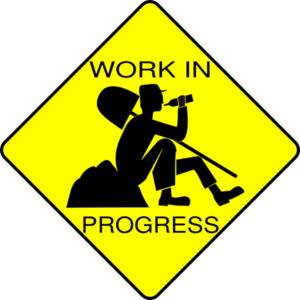

https://www.kaggle.com/code/javigallego/tps-apr22-eda-fe-lstm-tutorial#1-|-Introduction <br>
https://www.kaggle.com/code/andreshg/tps-apr-data-visualization-and-highlights